In [1]:
import numpy as np
import matplotlib.pyplot as plt

############################
###### Histogram plot ######
############################

def scale_of_y(res_dict:dict):

    acc_min_lst = []
    acc_max_lst = []
    for k,v in res_dict.items():
        acc_min_lst.append(min(v))
        acc_max_lst.append(max(v))
    y_min = min(acc_min_lst)*10
    y_max = max(acc_max_lst)*10
    del acc_min_lst,acc_max_lst

    # lower bound
    lower_bound = 0
    if y_min%10 < 0.5:
        lower_bound = np.floor(y_min)
    if y_min%10 >= 0.5:
        lower_bound = np.floor(y_min)-0.1
    # upper bound
    upper_bound = 0
    if y_max%10 < 0.5:
        upper_bound = np.ceil(y_max)+0.1
    if y_max%10 >= 0.5:
        upper_bound = np.ceil(y_max)

    lower_bound = lower_bound / 10.0
    upper_bound = upper_bound / 10.0
    return lower_bound, upper_bound

def plot_bar(res_dict:dict,
             x_tick:list,
             title:str,
             wid:float,
             blank:float,
             offset_lst:list,
             text_ratio:float,
             legend_loc:tuple,
             upper_offset:float):

    # limit of y-axis
    fig = plt.figure(figsize=(25,15),facecolor='white')  
    y_lower_bound, y_upper_bound = scale_of_y(res_dict)
    print("y_upper_bound: ", y_upper_bound)
    print("y_lower_bound: ", y_lower_bound)

    # plot parameters
    color_lst = ['steelblue','cadetblue','darkturquoise','skyblue',]

    # bar chart
    x = np.arange(0, len(x_tick))
    for idx, ((k, v_lst), offset, clr) in enumerate(zip(res_dict.items(),offset_lst,color_lst)):
        plt.bar(x+offset*wid, v_lst, width=wid-blank, label = k, color = clr)

    # add accuracy text
    for (k, v_lst), offset, clr in zip(res_dict.items(),offset_lst,color_lst):
        for idx,acc in enumerate(v_lst):
            plt.text(idx+offset*wid,acc+wid*text_ratio,round(acc, 3),color='forestgreen',ha='center',fontsize=30)

    plt.legend(fontsize=30,bbox_to_anchor=legend_loc)
    plt.title(title, fontsize=50)
    # plt.ylim(ymin=y_lower_bound, ymax=y_upper_bound+upper_offset)
    plt.ylim(ymin=0.0, ymax=1.0+upper_offset)
    plt.xticks(x, x_tick,fontsize = 35)
    plt.yticks(fontsize = 35)
    # plt.xlabel('Standarization',fontsize = 40)
    # plt.ylabel('Accuracy',fontsize = 40)

### Performances on different models

user1: Apostolos

user2: Jialei

y_upper_bound:  1.0
y_lower_bound:  0.6900000000000001


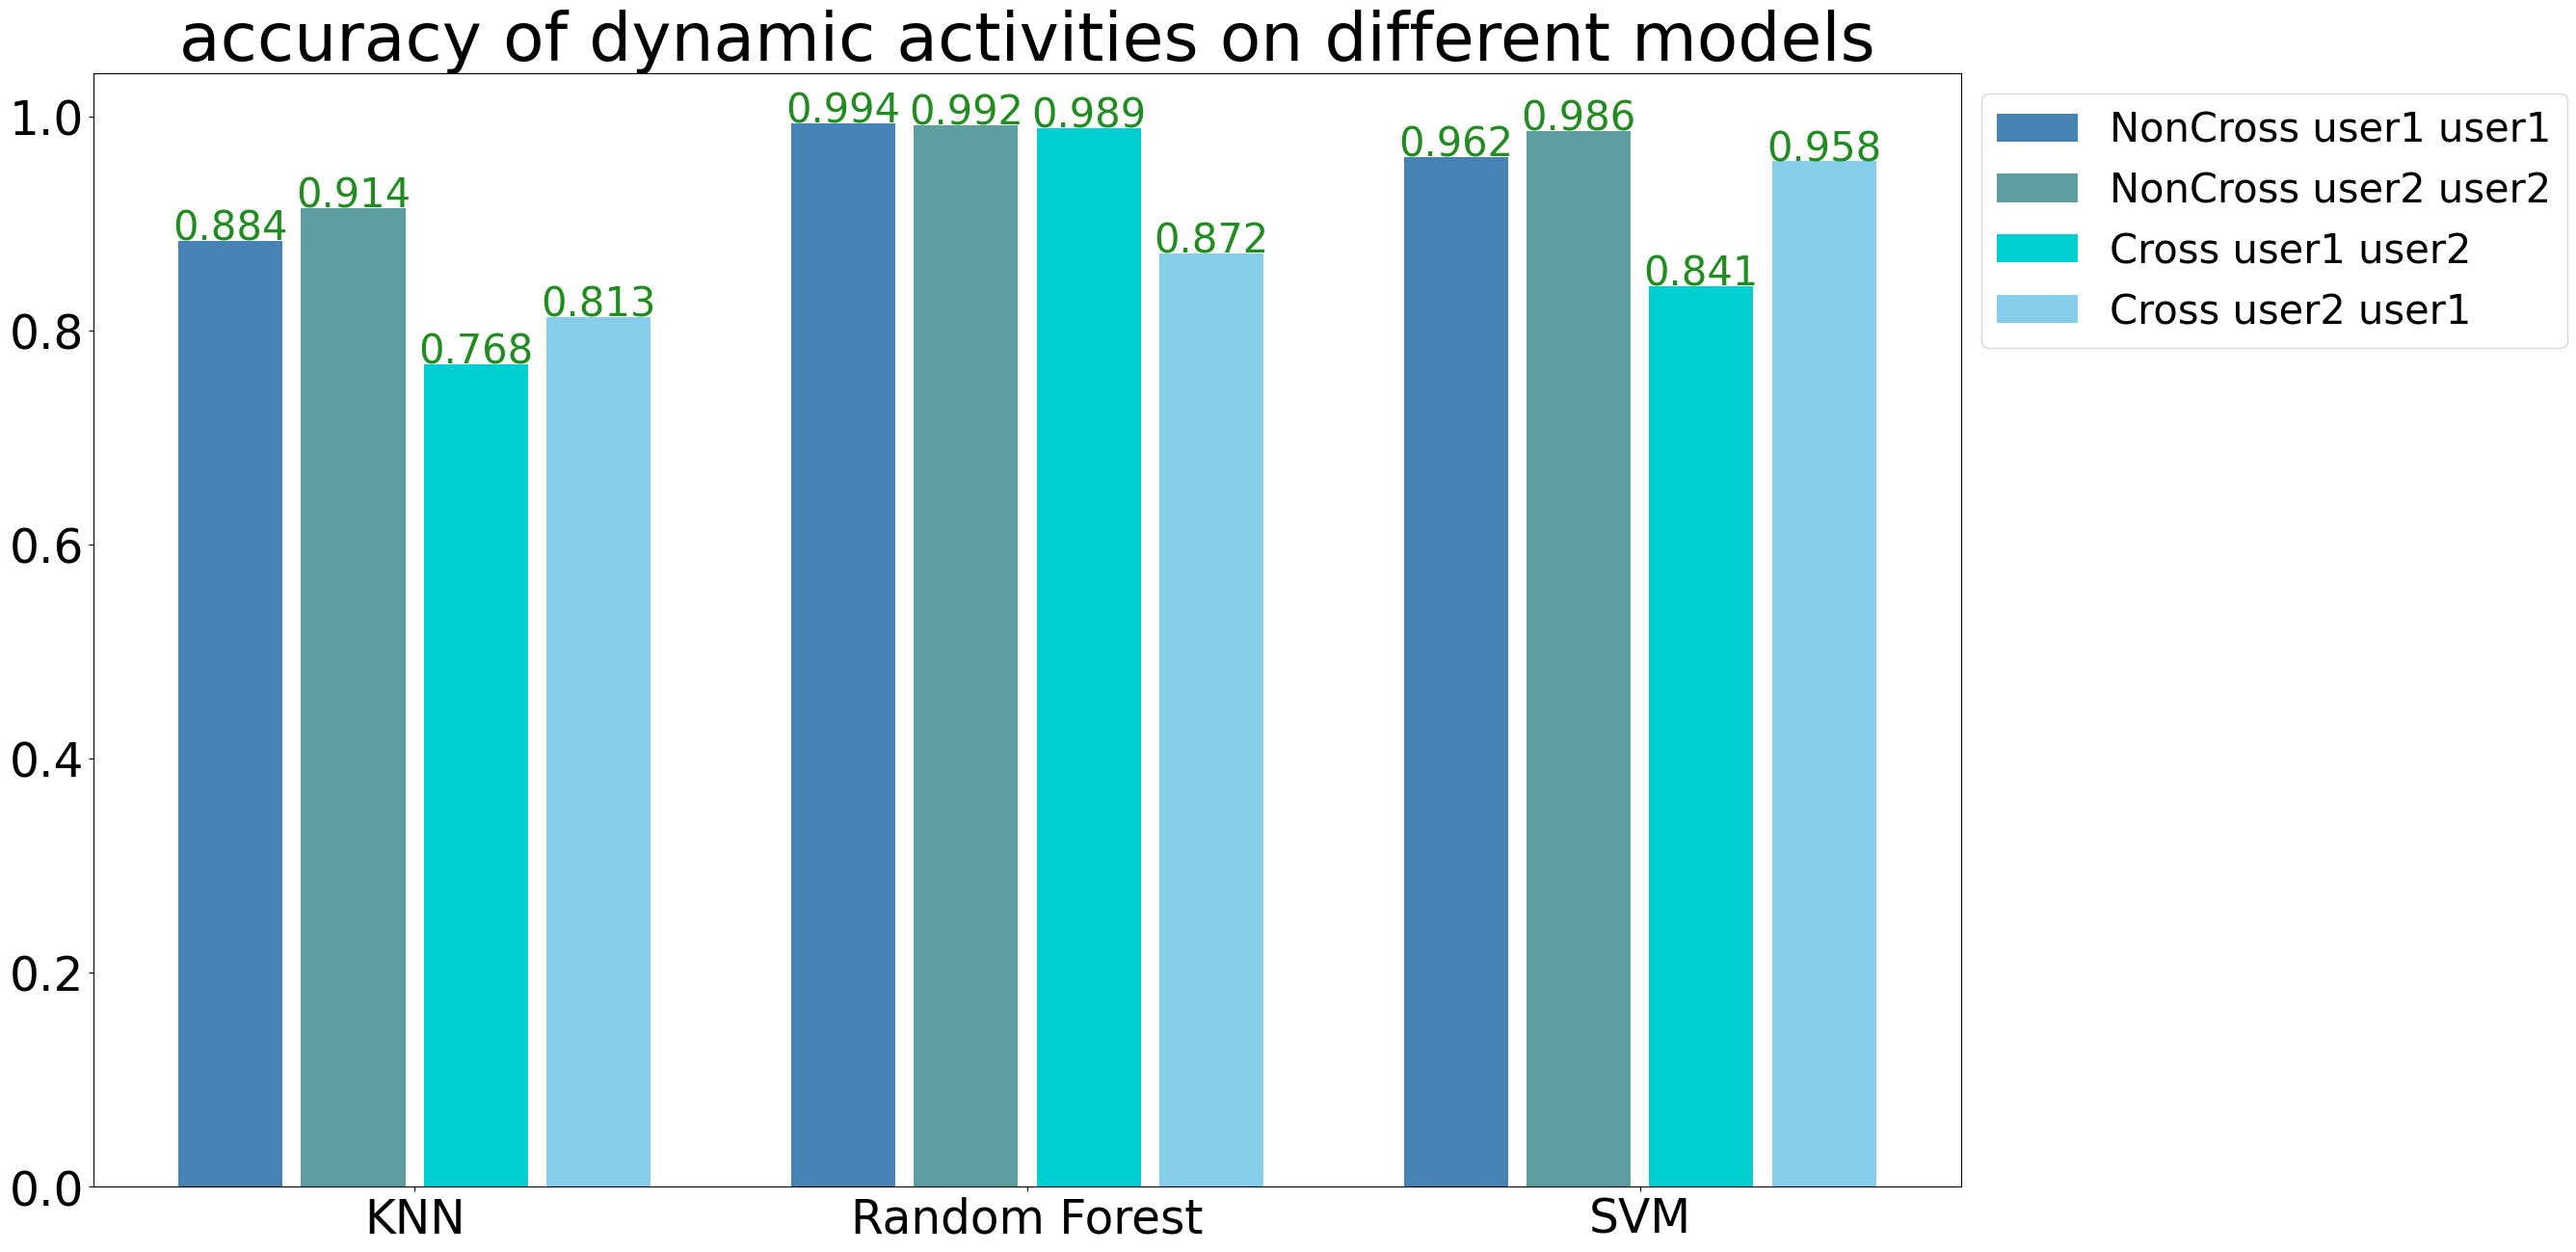

In [7]:
# dynamic
dynamic_res_dict = {'NonCross user1 user1': [0.8835995085995086,0.9936271498771498,0.9620700245700246],
                    'NonCross user2 user2': [0.9141292624242927,0.9916203434829503,0.9862274952294035],
                    'Cross user1 user2': [0.7684393926823198,0.9886335352194474,0.841035426864681],
                    'Cross user2 user1': [0.8127303439803439,0.8715448402948403,0.9579238329238329]}

plot_bar(res_dict=dynamic_res_dict,
         x_tick=['KNN', 'Random Forest', 'SVM'],
         title='accuracy of dynamic activities on different models',
         wid=0.2,
         blank=0.03,
         offset_lst=[-1.5,-0.5,0.5,1.5],
         text_ratio=0.005,
         legend_loc=(1,1),
         upper_offset=0.04)

y_upper_bound:  1.01
y_lower_bound:  0.39


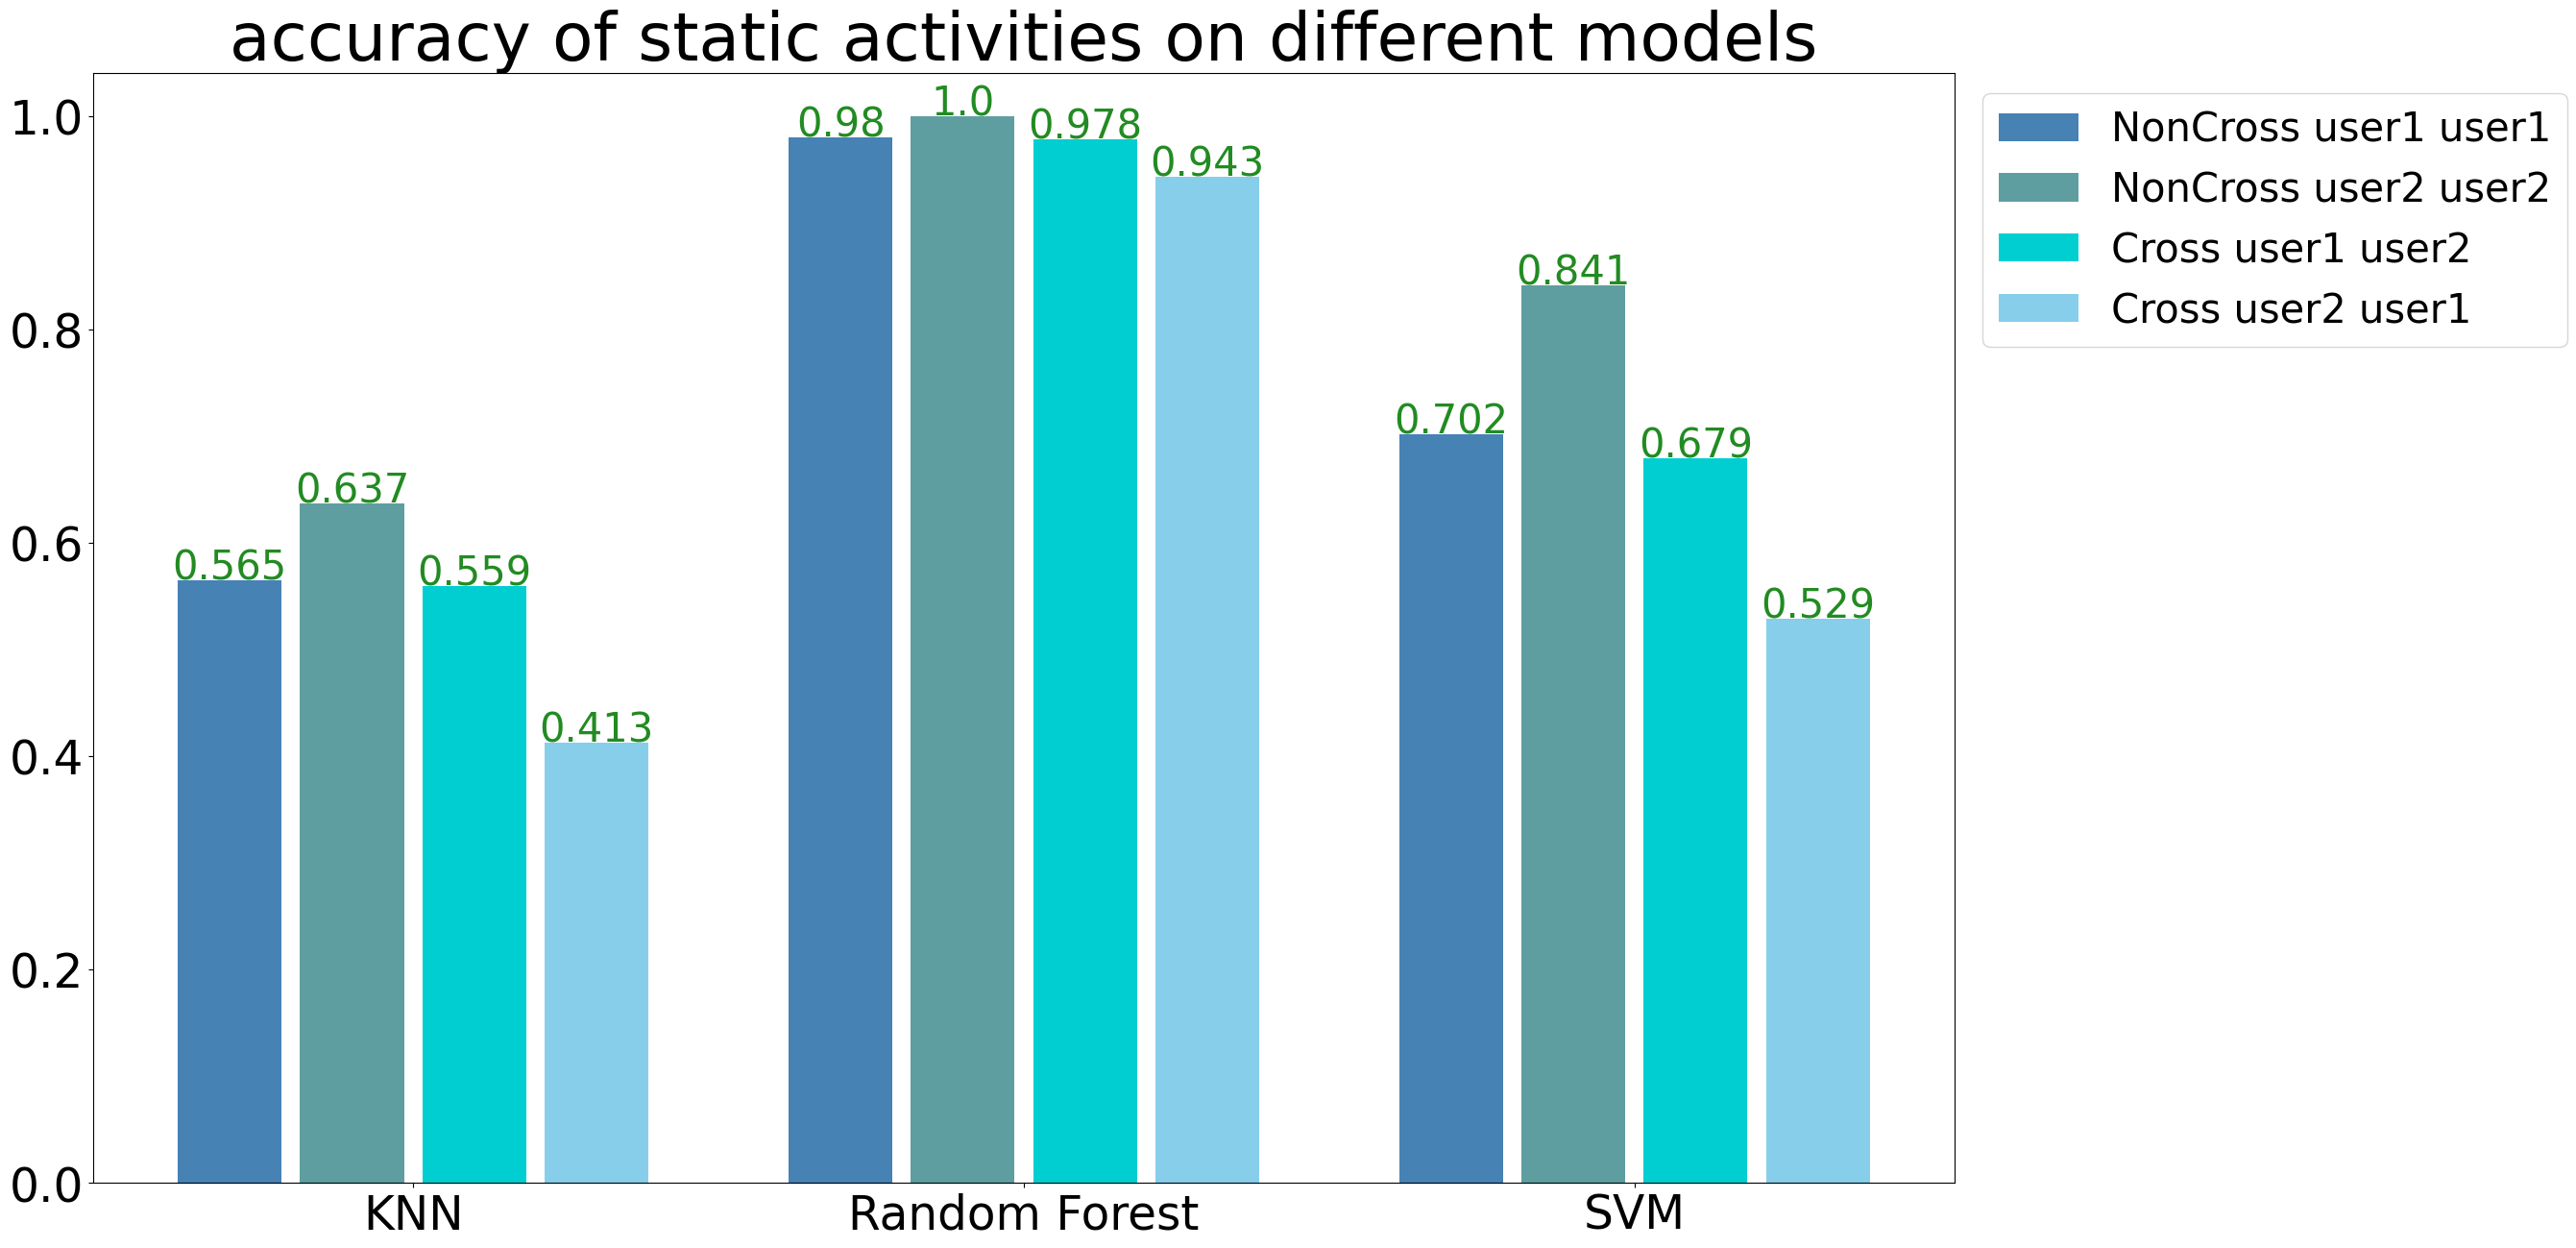

In [8]:
static_res_dict = {'NonCross user1 user1': [0.5646616541353383,0.9802631578947368,0.7016917293233083],
                   'NonCross user2 user2': [0.6370789279567248,1.0,0.8414064420949102],
                   'Cross user1 user2': [0.559134497172363,0.9781165478239489,0.6793705433980821],
                   'Cross user2 user1': [0.4129699248120301,0.9428571428571428,0.5291353383458647]}

plot_bar(res_dict=static_res_dict,
         x_tick=['KNN', 'Random Forest', 'SVM'],
         title='accuracy of static activities on different models',
         wid=0.2,
         blank=0.03,
         offset_lst=[-1.5,-0.5,0.5,1.5],
         text_ratio=0.005,
         legend_loc=(1.34,1),
         upper_offset=0.04)

### Influence of standardization

Comparison only carries on Random Forest, because as experience, Random Forest has best performance compared with KNN and SVM when there was no standardization.

result from [this Notion](https://www.notion.so/Report-on-11-09-159f6ec9eb7141a08d10624c324bcf2b)

y_upper_bound:  1.0
y_lower_bound:  0.89


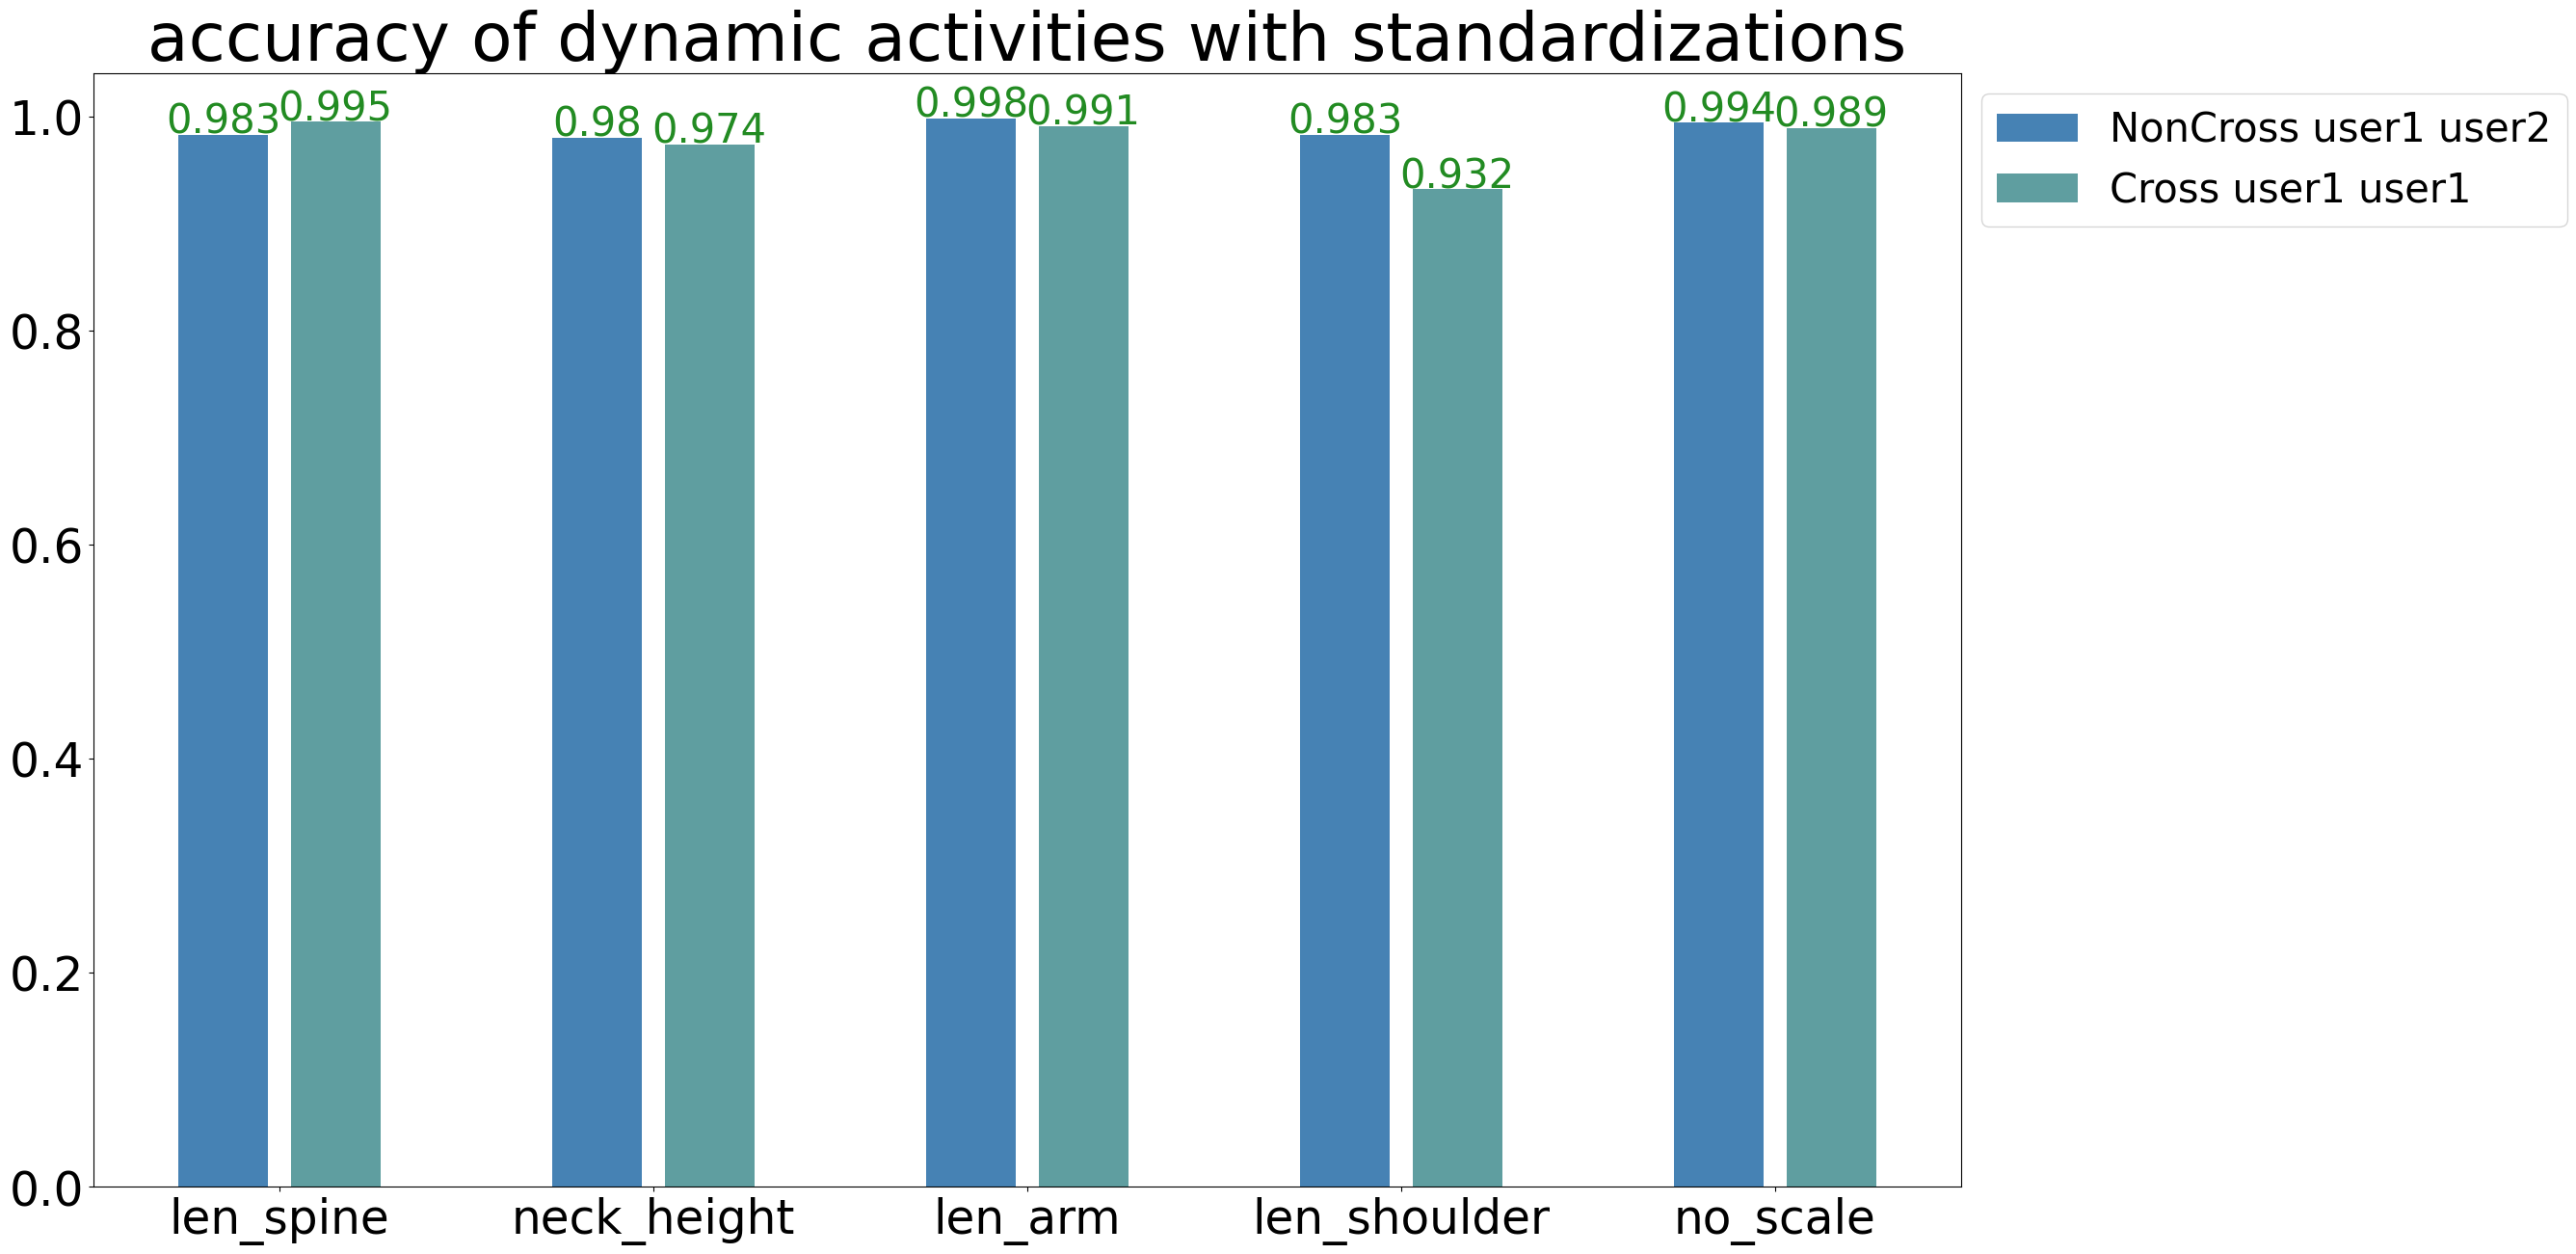

In [9]:
dynamic_res = {'NonCross user1 user2':[0.983,0.980,0.998,0.983,0.994],
               'Cross user1 user1':[0.995,0.974,0.991,0.932,0.989]}
plot_bar(res_dict=dynamic_res,
         x_tick=['len_spine', 'neck_height','len_arm','len_shoulder','no_scale'],
         title='accuracy of dynamic activities with standardizations',
         wid=0.3,
         blank=0.06,
         offset_lst=[-0.5,0.5],
         text_ratio=0.005,
         legend_loc=(1,1),
         upper_offset=0.04)

y_upper_bound:  1.01
y_lower_bound:  0.89


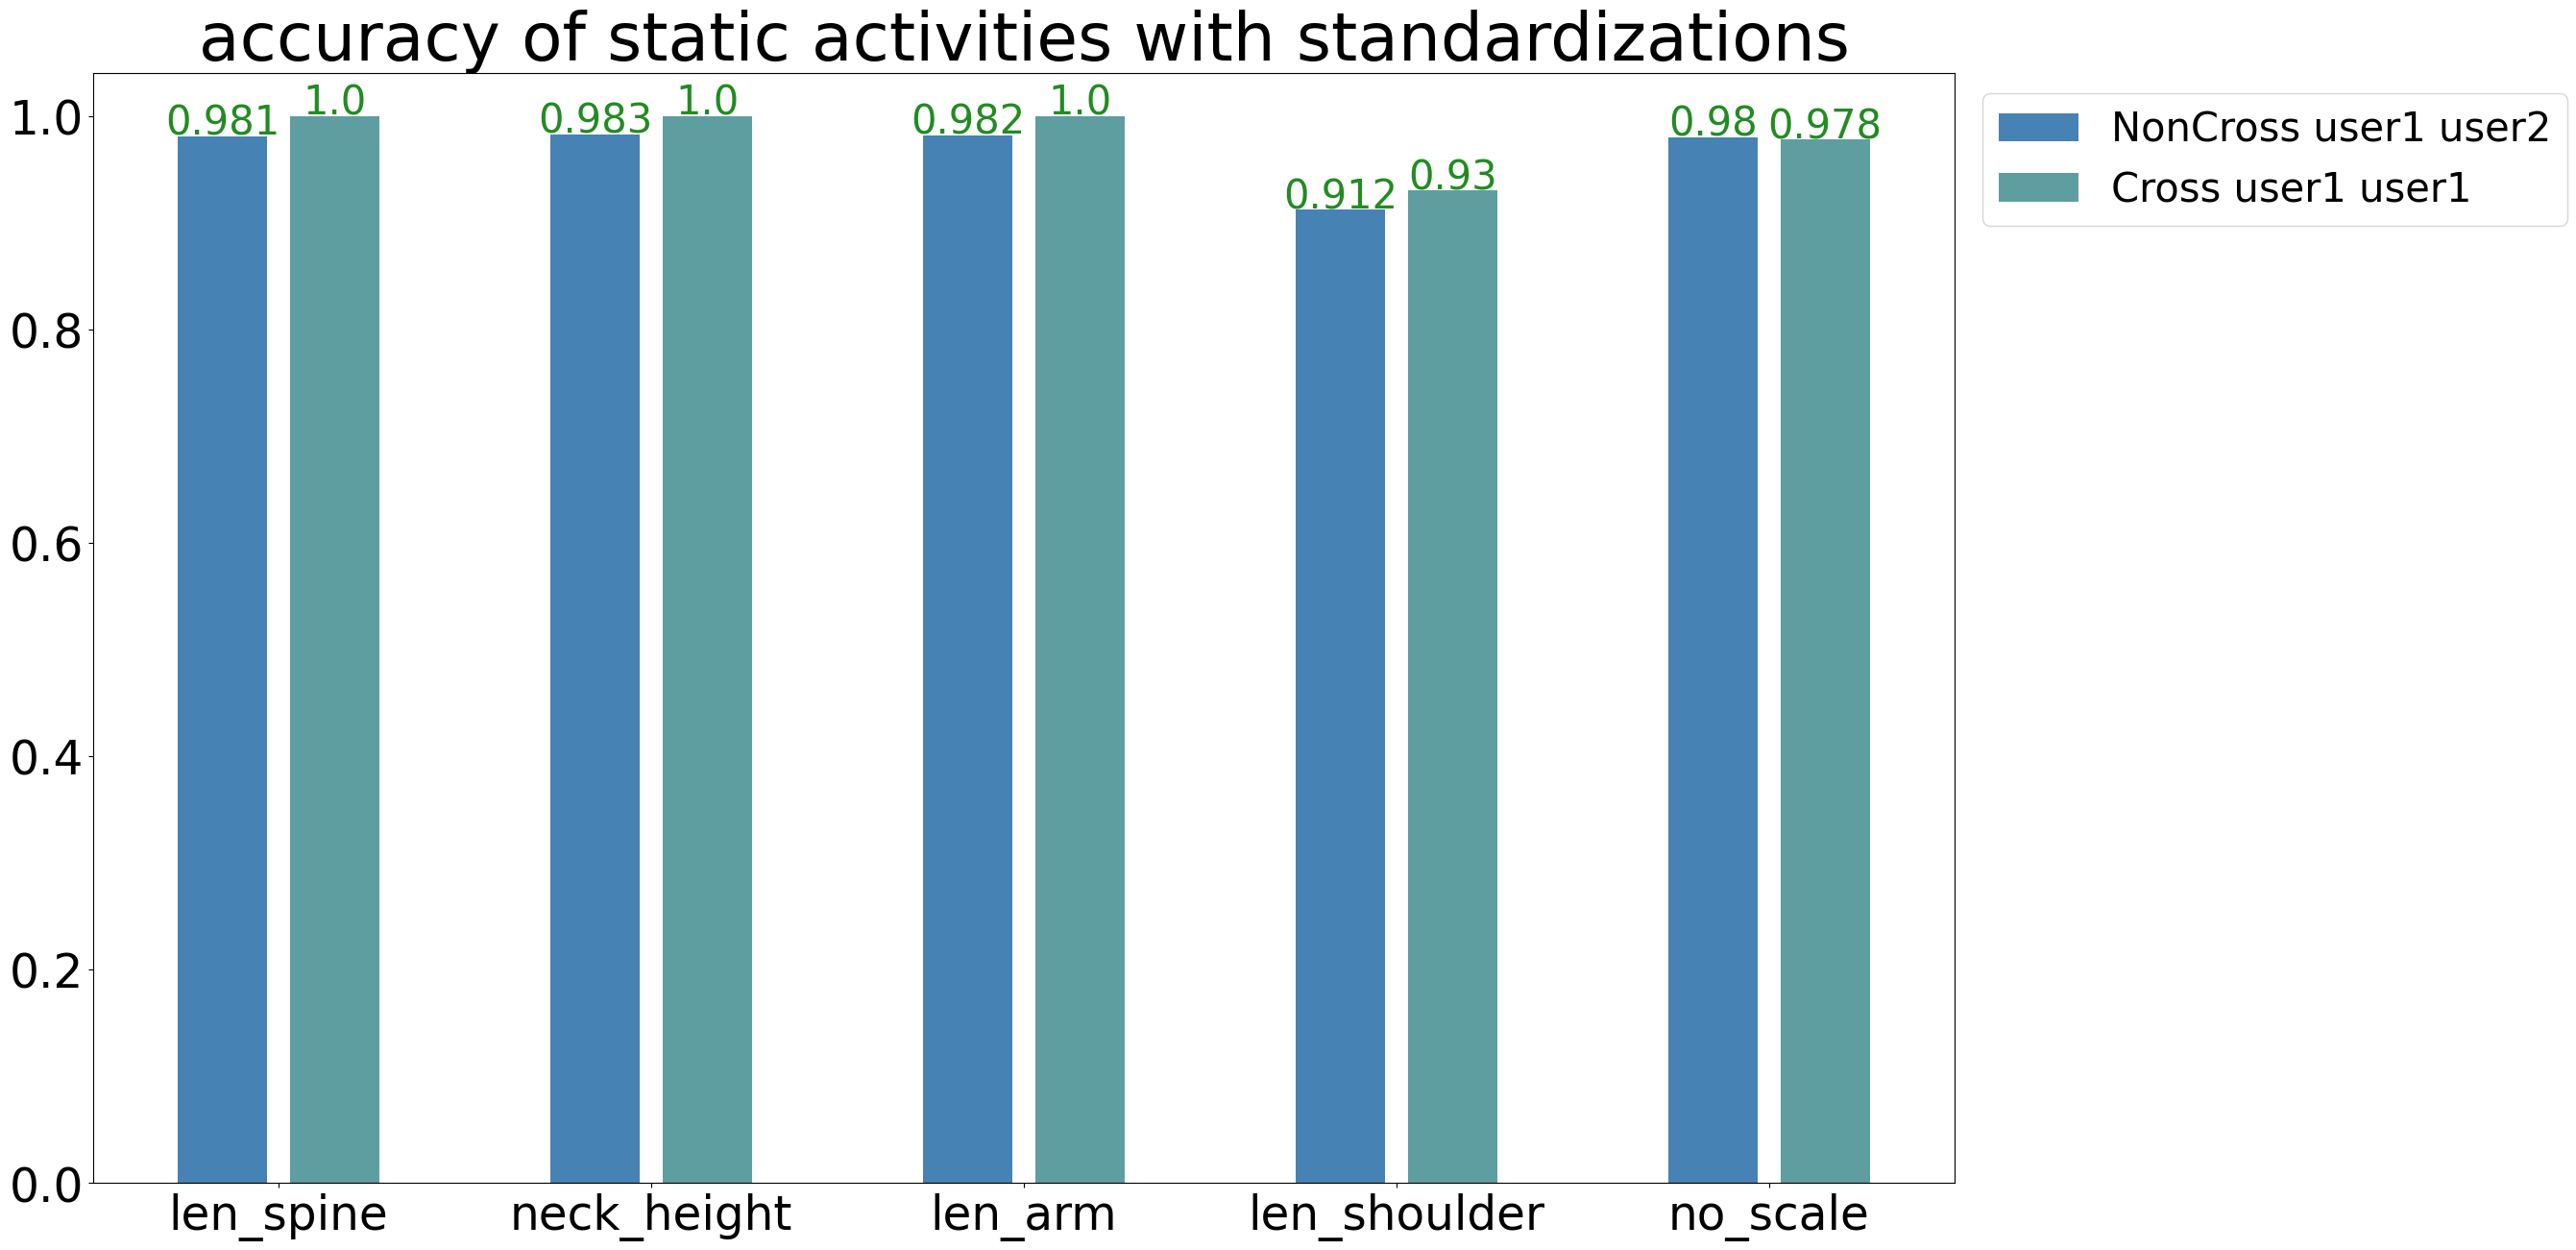

In [10]:
static_res = {'NonCross user1 user2':[0.981,0.983,0.982,0.912,0.98],
              'Cross user1 user1':[1.0,1.0,1.0,0.93,0.978]}
plot_bar(res_dict=static_res,
         x_tick=['len_spine', 'neck_height','len_arm','len_shoulder','no_scale'],
         title='accuracy of static activities with standardizations',
         wid=0.3,
         blank=0.06,
         offset_lst=[-0.5,0.5],
         text_ratio=0.005,
         legend_loc=(1.34,1),
         upper_offset=0.04)